In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"Downloads\BTC_USD.csv")
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2782,BTC,2021-05-14,49764.132082,49596.778891,51448.798576,46294.720180
2783,BTC,2021-05-15,50032.693137,49717.354353,51578.312545,48944.346536
2784,BTC,2021-05-16,47885.625255,49926.035067,50690.802950,47005.102292
2785,BTC,2021-05-17,45604.615754,46805.537852,49670.414174,43868.638969


In [4]:
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [5]:
df.tail()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
2782,BTC,2021-05-14,49764.132082,49596.778891,51448.798576,46294.720180
2783,BTC,2021-05-15,50032.693137,49717.354353,51578.312545,48944.346536
2784,BTC,2021-05-16,47885.625255,49926.035067,50690.802950,47005.102292
2785,BTC,2021-05-17,45604.615754,46805.537852,49670.414174,43868.638969
2786,BTC,2021-05-18,43144.471291,46439.336570,46622.853437,42102.346430


In [6]:
df.describe()

,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
count,2787.000000,2787.000000,2787.000000,2787.000000
mean,6529.845141,6513.579485,6710.061683,6302.417386
std,10887.847444,10863.800772,11206.779756,10475.811252
min,108.584830,108.584830,118.675000,83.328330
25%,460.087500,459.400500,469.720995,450.818830
50%,2780.182500,2772.367500,2874.696250,2696.457500
75%,8506.923720,8496.887593,8763.291985,8221.060570
max,63346.789035,63562.673545,64801.787870,62094.632914


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Date                 2787 non-null   object 
 2   Closing Price (USD)  2787 non-null   float64
 3   24h Open (USD)       2787 non-null   float64
 4   24h High (USD)       2787 non-null   float64
 5   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(2)
memory usage: 130.8+ KB


In [8]:
df.isnull().sum()

Currency               0
Date                   0
Closing Price (USD)    0
24h Open (USD)         0
24h High (USD)         0
24h Low (USD)          0
dtype: int64

In [9]:
df["Date"]=pd.to_datetime(df["Date"])

In [10]:
df.set_index('Date',inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [12]:
df=df.drop(['Currency', 'Closing Price (USD)','24h Open (USD)','24h Low (USD)'], axis=1)

In [13]:
df.rename(columns={'24h High (USD)':'Price'},inplace=True)

In [14]:
df.head()

,Price
Date,
2013-10-01,124.75166
2013-10-02,125.75850
2013-10-03,125.66566
2013-10-04,118.67500
2013-10-05,121.93633


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   2787 non-null   float64
dtypes: float64(1)
memory usage: 43.5 KB


<Figure size 2200x2200 with 0 Axes>

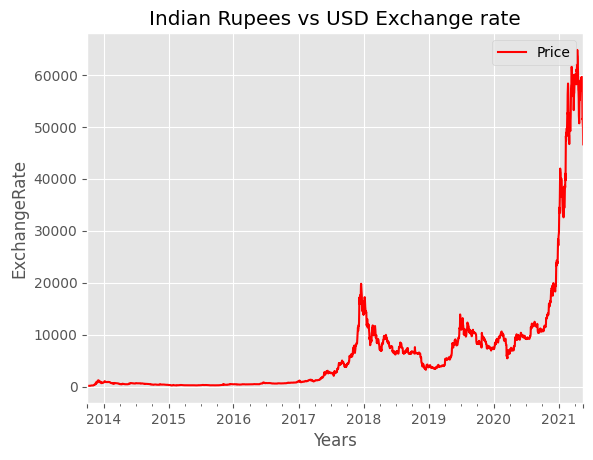

In [16]:
plt.figure(figsize=(22,22))
plt.style.use('ggplot')
df.plot(color='red')
plt.title('Indian Rupees vs USD Exchange rate')
plt.xlabel('Years')
plt.ylabel('ExchangeRate')
plt.legend()

In [17]:
ts=df["Price"].resample('D').mean()
ts

Date
2013-10-01      124.751660
2013-10-02      125.758500
2013-10-03      125.665660
2013-10-04      118.675000
2013-10-05      121.936330
                  ...     
2021-05-14    51448.798576
2021-05-15    51578.312545
2021-05-16    50690.802950
2021-05-17    49670.414174
2021-05-18    46622.853437
Freq: D, Name: Price, Length: 2787, dtype: float64

<Axes: xlabel='Date'>

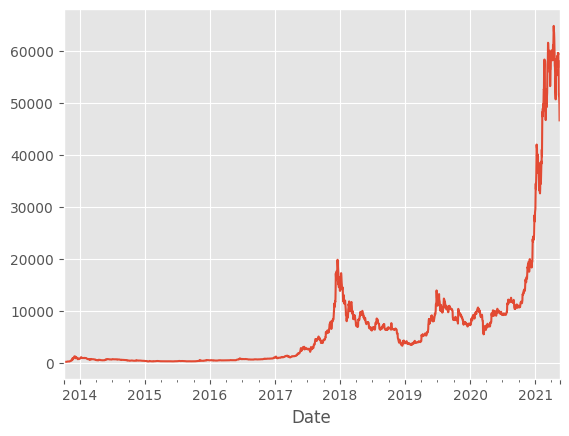

In [18]:
ts.plot()

In [19]:
import statsmodels.api as sm

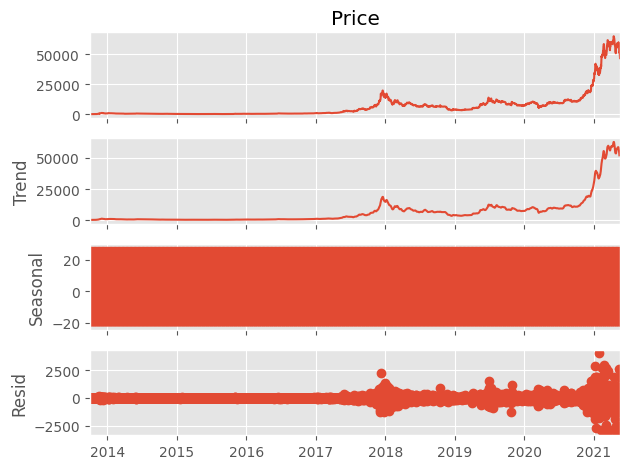

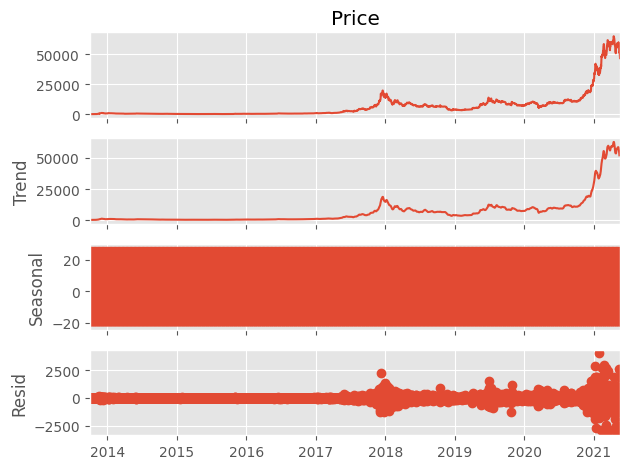

In [20]:
decompistion=sm.tsa.seasonal_decompose(ts,model="additive")
decompistion.plot()

In [21]:
test=adfuller(ts)
print("p-value:",test[1])

p-value: 0.9815933704035186


In [22]:
len(ts)

2787

In [23]:
train=ts[:2650]
test=ts[2650:]

In [24]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(3, 2, 2)).fit()

In [25]:
y_pred=model.predict(len(train),len(ts)-1)
y_pred.head()

2021-01-02    29370.318169
2021-01-03    29542.508819
2021-01-04    29739.712820
2021-01-05    29926.450191
2021-01-06    30104.386142
Freq: D, Name: predicted_mean, dtype: float64

In [26]:
error=np.sqrt(mean_squared_error(test,y_pred))
error

12252.555370556738

In [27]:
test.mean(),np.sqrt(test.var())

(50416.70207340624, 9597.352312797804)

<Axes: xlabel='Date'>

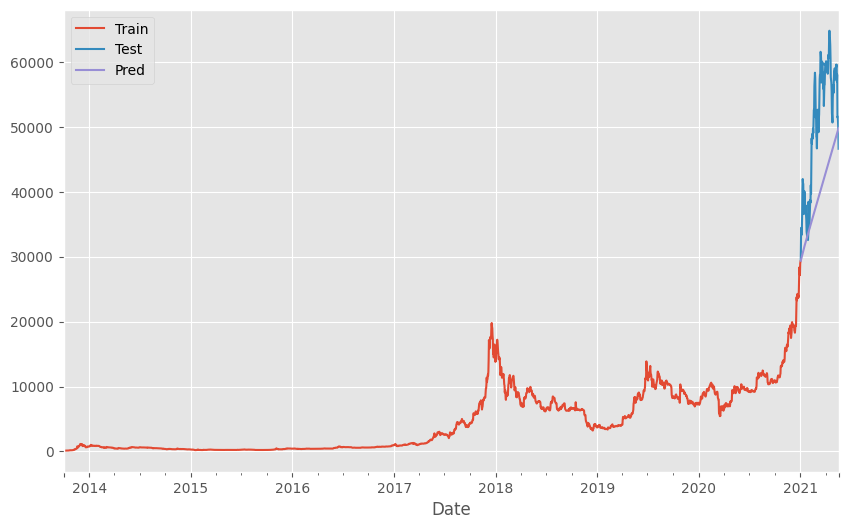

In [28]:
train.plot(legend=True,label="Train",figsize=(10,6))
test.plot(legend=True,label="Test")
y_pred.plot(legend=True,label="Pred")

In [29]:
final_model=ARIMA(ts,order=(3,2,2)).fit()

(array([46000., 46200., 46400., 46600., 46800., 47000., 47200., 47400.]),
 [Text(0, 46000.0, '46000'),
  Text(0, 46200.0, '46200'),
  Text(0, 46400.0, '46400'),
  Text(0, 46600.0, '46600'),
  Text(0, 46800.0, '46800'),
  Text(0, 47000.0, '47000'),
  Text(0, 47200.0, '47200'),
  Text(0, 47400.0, '47400')])

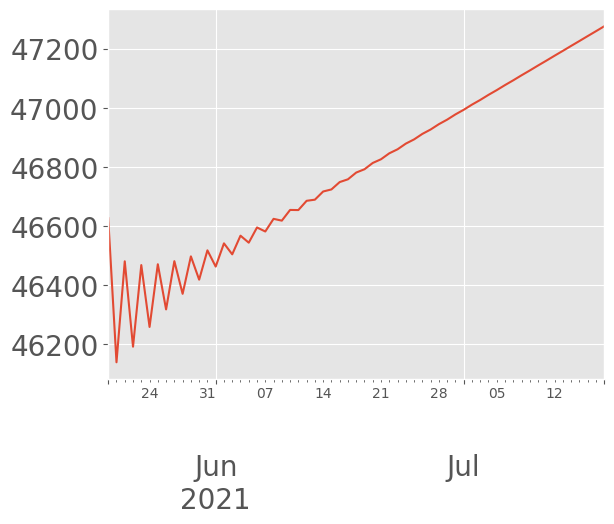

In [30]:
prediction=final_model.predict(len(ts),len(ts)+60)
prediction.plot()
plt.xticks(size=20)
plt.yticks(size=20)